# title:        MULAN: A Blind and Off-Grid Method for Multichannel Echo Retrieval

authors:  helena.peic.tukuljac@gmail.com, antoine.deleforge@inria.fr

year:        2018

license:    GPL v3

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=5)
import pickle

from algorithm import run
from algorithm import InitializationType
from measurement_tools import InputSignalType
from measurement_tools import FilterType
from test_tools import get_reconstruction_error

In [2]:
Ts = 0.25 # ensure rich spectral content (non-zero observed frequencies)
K = 3
M = 3
Fs = 16000
nF = 401 # keep the number of frequencies odd
SNR = 1000

init_option = InitializationType.Random
filter_option = FilterType.Artificial              # Artificial or Simulation
input_signal_option = InputSignalType.Artificial   # Artificial or Speech

for file_number in reversed(range(1)):
    relative_delays, relative_delays_r, relative_amplitudes, relative_amplitudes_r, tau, tau_r, alpha, alpha_r, sf, sf_r = \
    run(Ts, K, M, Fs, nF, SNR, init_option, filter_option, input_signal_option, file_number + 1)
    print('Location recovery difference:')
    print(relative_delays - relative_delays_r)
    print('Weight recovery difference:')
    print(abs(relative_amplitudes) - abs(relative_amplitudes_r))
    print('MSE for locations: ')
    print(get_reconstruction_error(M, relative_delays, relative_delays_r))
    print('MSE for weights: ')
    print(get_reconstruction_error(M, abs(relative_amplitudes), abs(relative_amplitudes_r)))
    print('-----------------------------------------------------------------')

[algorithm.py:  79 -                mulan() ] M = 3 K = 3 nF = 401 - min: 200.00; step: 4.50 [Hz]; max: 2000.00
[algorithm.py: 114 -                mulan() ] Initialization counter: 1 out of 20; objective function: 1.314018e-06
[algorithm.py: 114 -                mulan() ] Initialization counter: 2 out of 20; objective function: 1.314132e-06
[algorithm.py: 114 -                mulan() ] Initialization counter: 3 out of 20; objective function: 3.747828e-06
[algorithm.py: 114 -                mulan() ] Initialization counter: 4 out of 20; objective function: 1.313914e-06
[algorithm.py: 114 -                mulan() ] Initialization counter: 5 out of 20; objective function: 1.313891e-06
[algorithm.py: 114 -                mulan() ] Initialization counter: 6 out of 20; objective function: 1.313876e-06
[algorithm.py: 114 -                mulan() ] Initialization counter: 7 out of 20; objective function: 4.403421e-25
[algorithm.py: 122 -                mulan() ] Lowest objective function valu

Location recovery difference:
[[ 0.00000e+00  4.83988e-16  1.73472e-17]
 [ 5.20417e-16  2.35229e-15  9.92262e-16]
 [ 1.13798e-15  3.60822e-16 -6.24500e-16]]
Weight recovery difference:
[[ 0.00000e+00  1.18372e-12  4.68736e-13]
 [ 5.49893e-13 -2.45381e-12 -7.80209e-13]
 [-1.38778e-13  1.17256e-12  1.83054e-12]]
MSE for locations: 
9.909813570739066e-16
MSE for weights: 
1.2155586363724124e-12
-----------------------------------------------------------------


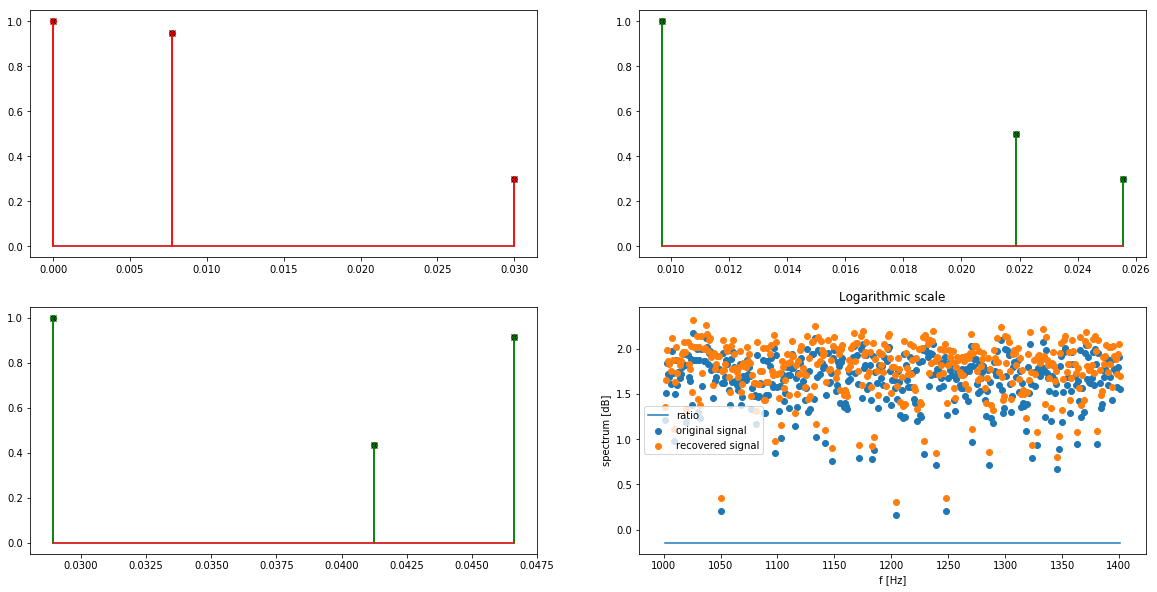

In [3]:
# PLOT1: FILTER (EARLY REFLECTIONS IN THE IMPULSE RESPONSE) RECOVERY\n"
fig, axes = plt.subplots(2, 2, figsize=(20,10))
axes[0,0].stem(relative_delays[:, 0], abs(relative_amplitudes[:, 0]), linefmt='r-', markerfmt='ro')
axes[0,0].stem(relative_delays_r[:, 0], abs(relative_amplitudes_r[:, 0]), linefmt='r-', markerfmt='kx')
#axes[0,0].stem(tau_r[:, 0], abs(relative_amplitudes_r[:, 0]), linefmt='r-', markerfmt='kx')
axes[0,1].stem(relative_delays[:, 1], abs(relative_amplitudes[:, 1]), linefmt='g-', markerfmt='go')
axes[0,1].stem(relative_delays_r[:, 1], abs(relative_amplitudes_r[:, 1]), linefmt='g-', markerfmt='kx')
#axes[0,1].stem(tau_r[:, 1], abs(relative_amplitudes_r[:, 1]), linefmt='g-', markerfmt='kx')
axes[1,0].stem(relative_delays[:, 2], abs(relative_amplitudes[:, 2]), linefmt='g-', markerfmt='go')
axes[1,0].stem(relative_delays_r[:, 2], abs(relative_amplitudes_r[:, 2]), linefmt='g-', markerfmt='kx')
# PLOT2: SIGNAL SPECTRUM RECOVERY
min_separation = 0.001
f = np.arange(1, nF + 1) + int(1/min_separation)
axes[1,1].scatter(f, np.log10(np.abs(sf)), label="original signal")
axes[1,1].scatter(f, np.log10(np.abs(sf_r)), label="recovered signal")
axes[1,1].plot(f, np.log10(np.abs(sf/sf_r)), label="ratio")
axes[1,1].set_xlabel('f [Hz]')
axes[1,1].set_ylabel('spectrum [dB]')
axes[1,1].set_title('Logarithmic scale')
axes[1,1].legend()